# Potential for Lennard-Jones macro-Particle

The so-called macro-Particle is a spherical nanoparticle composed of Lennard-Jones particles. We will now demonstrate the potential for a variety of parameters and visualise it. Here is the form of the potential:

$$ V_{NP} = \frac{ 2 \pi \varepsilon n_V \sigma ^ n}{2-n} \Bigg( \frac{ \Big ( 2 R(t) - (R(t) + r_E)^2\Big)^\frac{4-n}{2}-\Big(-2r_E^2 - 3r_ER(t)\Big)^\frac{4-n}{2}}{(R(t)+r_E)(n-4)}\nonumber - \frac{(2R(t)+r_E)^{3-n} - r_E^{3-n}}{3-n} \Bigg) $$

In [1]:
# Uncomment and run this cell to install the hydrogels module

# requirements:
# readdy (this would contain all the prerequirements)
# g++, numpy, scipy, matplotlib

# readdy installation - https://readdy.github.io/installation.html

#!git clone https://github.com/debeshmandal/hydrogels
#!cd hydrogels
#!git checkout lj-gel
#!pip install .

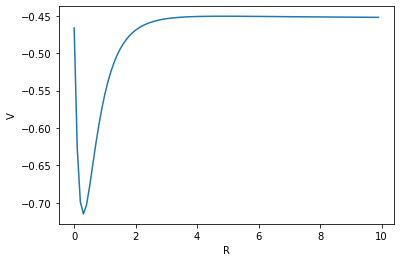

      R         V
0   0.0 -0.466330
1   0.1 -0.626865
2   0.2 -0.698459
3   0.3 -0.714855
4   0.4 -0.703113
..  ...       ...
95  9.5 -0.452087
96  9.6 -0.452112
97  9.7 -0.452136
98  9.8 -0.452159
99  9.9 -0.452182

[100 rows x 2 columns]


In [2]:
from hydrogels.theory.models import potentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def LJ_macro12_6(
        sig : float =1.0, 
        eps : float = 1.0, 
        R : float = 1.0, 
        rE : float = 1.0, 
        nV : float = 1.0
    ) -> 'V':
    component_12 = potentials.macro_LJ(sig, eps, nV, 12, rE, R)
    component_6 = potentials.macro_LJ(sig, eps, nV, 6, rE, R)
    return component_12 - component_6

Rs = np.arange(0., 10.0, 0.1)
result = [LJ_macro12_6(R=i, rE=1.0) for i in Rs]
plt.plot(Rs, result)
plt.xlabel('R')
plt.ylabel('V')
plt.show()
print(pd.DataFrame({'R':Rs, 'V':result}))

## Testing over $\sigma$  and $\varepsilon$

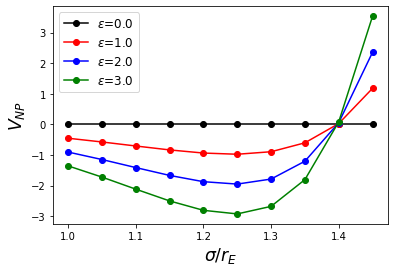

In [3]:
import matplotlib.pyplot as plt
import numpy as np
kwargs = {
    'R' : 10.0,
    'rE' : 1.0,
    'nV' : 1.0
}
sigs = np.arange(1.0, 1.5, 0.05)
epss = [0.0, 1.0, 2.0, 3.0]
fig, ax = plt.subplots()
colours = ['k', 'r', 'b', 'g']
for i, eps in enumerate(epss):
    values = [LJ_macro12_6(sig=j, eps=eps, **kwargs) for j in sigs]
    plt.plot(sigs/kwargs['rE'], values, f'{colours[i]}-o', label=fr"$\varepsilon$={eps}")
ax.set_xlabel(r"$\sigma / r_E$", fontsize='xx-large')
ax.set_ylabel(r"$V_{NP}$", fontsize='xx-large')
ax.legend(fontsize='large')
None

There is interplay between $\sigma/r_E$ and $\varepsilon$. It seems that:
- The value for $\sigma/r_E$ decides that point at which the potential changes from attractive (negative) to repulsive (positive)
- Increasing $\varepsilon$ increases the magnitude of the potential
- We also saw that changing $R$ does not have an effect and also changing $n_V$ has the same effect as changing $\varepsilon$.

## Testing over $\frac{R}{r_E}$ and $R+r_E$

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

kwargs = {
    'eps' : 1.0,
    'sig' : 1.0,
    'nV' : 10.0
}
Rs = np.arange(0., 300., 10.)
rEs = np.arange(5.0, 20.0, 0.5)
ax_1 = []
ax_2 = []
V = []
for i, R in enumerate(Rs):
    for j, rE in enumerate(rEs):
        ax_1.append(R+rE)
        ax_2.append(R/rE)
        V.append(LJ_macro12_6(R=R, rE=rE, **kwargs))
V = np.array(V)
#V = abs(V / abs(V).max())
#print(V)
None

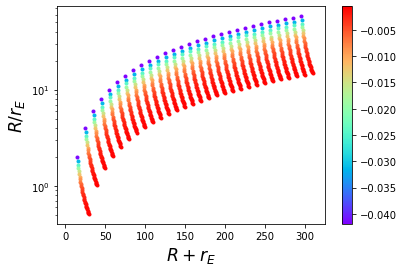

In [5]:
fig, ax = plt.subplots()
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=V.min(), vmax=V.max())
colours = cmap(norm(V))

for i, (val_1, val_2) in enumerate(zip(ax_1, ax_2)):
    colour = colours[i]
    ax.plot(val_1, val_2, '.', c=colour)
ax.set_xlabel(r"$R + r_E$", fontsize='xx-large')
ax.set_ylabel(r"$R/r_E$", fontsize='xx-large')
ax.set_yscale('log')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
None

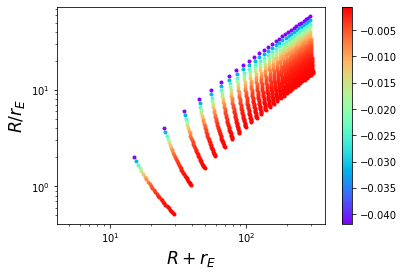

In [6]:
fig, ax = plt.subplots()
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=V.min(), vmax=V.max())
colours = cmap(norm(V))

for i, (val_1, val_2) in enumerate(zip(ax_1, ax_2)):
    colour = colours[i]
    ax.plot(val_1, val_2, '.', c=colour)
ax.set_xlabel(r"$R + r_E$", fontsize='xx-large')
ax.set_ylabel(r"$R/r_E$", fontsize='xx-large')
ax.set_yscale('log')
ax.set_xscale('log')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)
None

It is difficult to describe this relationship, but there seems to be a field defined by $R/r_E$ and $R+r_E$ which provides a maximum potential generated by the nanoparticle. In general, there seems to be a power law which would summarise that as the sum of the radius of the nanoparticle and the enzyme increases, and the size of the nanoparticle relative to the size of the enzyme increases, the potential increases.

# Numerical Integrations - Parametric Study

## Introduction

Now we will use a previously described numerical integration system to run some parametric studies using this potential.

100%|██████████| 100000/100000 [00:01<00:00, 67129.91it/s]


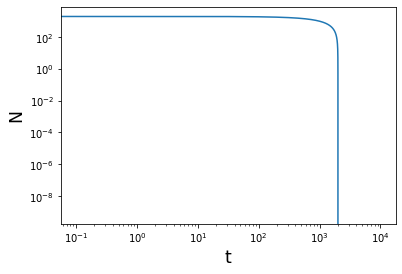

In [31]:
from hydrogels.theory.models.simulations.constant_density import ConstantDensity, Equation
simu = ConstantDensity(0.1, Equation(LJ_macro12_6), N=2000, constants={'sig':1.0, 'eps':0.0, 'rE':1.0, 'nV':0.01})
simu.run(100000)
data = simu.history.dataframe
fig, ax = plt.subplots()
ax.plot(data['t'], data['N'])
ax.set_xlabel('t', fontsize='xx-large')
ax.set_ylabel('N', fontsize='xx-large')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(5, 100)
#ax.set_ylim(0.75*data['R'].max(), 0.25*data['R'].max())
None

## Iterating over parameters
In this section, we will iterate over similar values that we described above, for example: $\sigma$, $\varepsilon$, $R_0/r_E$.

100%|██████████| 1000/1000 [00:00<00:00, 73901.93it/s]


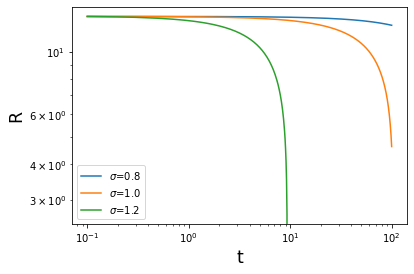

In [8]:
import copy
constants = {'sig':1.4, 'eps':5.0, 'rE':1.0, 'nV':1.0}
fig, ax = plt.subplots()
ax.set_xlabel('t', fontsize='xx-large')
ax.set_ylabel('R', fontsize='xx-large')
ax.set_xscale('log')
ax.set_yscale('log')
for sigma in [0.8, 1.0, 1.2]:
    temp = copy.deepcopy(constants)
    temp['sig'] = sigma
    simu = ConstantDensity(0.1, Equation(LJ_macro12_6), N=1000, constants=temp)
    simu.run(1000)
    data = simu.history.dataframe
    ax.plot(data['t'], data['R'], label=fr"$\sigma$={sigma}")
ax.legend()
None

100%|██████████| 1000/1000 [00:00<00:00, 52227.72it/s]


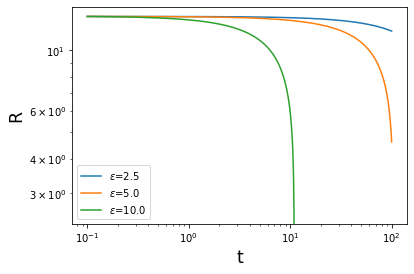

In [9]:
constants = {'sig':1.0, 'eps':5.0, 'rE':1.0, 'nV':1.0}
fig, ax = plt.subplots()
ax.set_xlabel('t', fontsize='xx-large')
ax.set_ylabel('R', fontsize='xx-large')
ax.set_xscale('log')
ax.set_yscale('log')
for epsilon in [2.5, 5.0, 10.]:
    temp = copy.deepcopy(constants)
    temp['eps'] = epsilon
    simu = ConstantDensity(0.1, Equation(LJ_macro12_6), N=1000, constants=temp)
    simu.run(1000)
    data = simu.history.dataframe
    ax.plot(data['t'], data['R'], label=fr"$\varepsilon$={epsilon}")
ax.legend()
None

100%|██████████| 1000/1000 [00:00<00:00, 73024.43it/s]


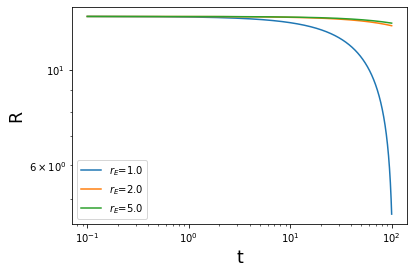

In [10]:
constants = {'sig':1.0, 'eps':5.0, 'rE':1.0, 'nV':1.0}
fig, ax = plt.subplots()
ax.set_xlabel('t', fontsize='xx-large')
ax.set_ylabel('R', fontsize='xx-large')
ax.set_xscale('log')
ax.set_yscale('log')
for rE in [1.0, 2.0, 5.0]:
    temp = copy.deepcopy(constants)
    temp['rE'] = rE
    simu = ConstantDensity(0.1, Equation(LJ_macro12_6), N=1000, constants=temp)
    simu.run(1000)
    data = simu.history.dataframe
    ax.plot(data['t'], data['R'], label=fr"$r_E$={rE}")
ax.legend()
None

## Notes
- There is interplay between $\sigma$ and $r_E$ since if $\sigma$ is much smaller than $r_E$, the enzyme will not feel a large amount of interaction
- $\varepsilon$ and $n_V$ determine the strength of the interaction
- Unsure of the significance of $R$ and $r_E$